In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


In [51]:
df = pd.read_csv('StudentsPerformance.csv')

In [52]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [53]:
x = df.drop(columns=['math score'],axis = 1)
y = df['math score']

In [54]:
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [55]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [56]:
#create column transformers with 3 types of transformers
num_features = x.select_dtypes(exclude ='object').columns
categoric_features = x.select_dtypes(include ='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer= StandardScaler()
oh_tranformer = OneHotEncoder()
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_tranformer,categoric_features),
        ("StandardScaler",num_transformer,num_features)
    ]
)

In [57]:
print(num_features)
print(categoric_features)

Index(['reading score', 'writing score'], dtype='object')
Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')


In [58]:
x = preprocessor.fit_transform(x)

In [59]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [60]:
x.shape

(1000, 19)

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((800, 19), (200, 19))

In [62]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rsme = np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,mse,rsme,r2_square

In [65]:
models = {
    "LinearRegression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "Decision tree": DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor()
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    model_train_mae,model_train_mse,model_train_rsme,model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_mse,model_test_rsme,model_test_r2 = evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("model performance for traing set")
    print("root mean squared error: {:.4f}".format(model_train_rsme))
    print("mean absoulte error: {:.4f}".format(model_train_mae))
    print("r2 score: {:.4f}".format(model_train_r2))
    
    
    print("model performance for test set")
    print("root mean squared error: {:.4f}".format(model_test_rsme))
    print("mean absoulte error: {:.4f}".format(model_test_mae))
    print("r2 score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

LinearRegression
model performance for traing set
root mean squared error: 5.3231
mean absoulte error: 4.2667
r2 score: 0.8743
model performance for test set
root mean squared error: 5.3940
mean absoulte error: 4.2148
r2 score: 0.8804
Lasso
model performance for traing set
root mean squared error: 6.5938
mean absoulte error: 5.2063
r2 score: 0.8071
model performance for test set
root mean squared error: 6.5197
mean absoulte error: 5.1579
r2 score: 0.8253
Ridge
model performance for traing set
root mean squared error: 5.3233
mean absoulte error: 4.2650
r2 score: 0.8743
model performance for test set
root mean squared error: 5.3904
mean absoulte error: 4.2111
r2 score: 0.8806
KNeighborsRegressor
model performance for traing set
root mean squared error: 5.7088
mean absoulte error: 4.5177
r2 score: 0.8554
model performance for test set
root mean squared error: 7.2494
mean absoulte error: 5.6090
r2 score: 0.7840
Decision tree
model performance for traing set
root mean squared error: 0.2795


In [67]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['model name','r2_score']).sort_values(by=["r2_score"],ascending=False)

,model name,r2_score
2,Ridge,0.880593
0,LinearRegression,0.880433
5,RandomForestRegressor,0.852827
7,CatBoostRegressor,0.851632
8,AdaBoostRegressor,0.846410
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,KNeighborsRegressor,0.784030
4,Decision tree,0.732697


Linear Regression

In [68]:
linear_model = LinearRegression(fit_intercept=True)
linear_model = linear_model.fit(x_train,y_train)
y_pred = linear_model.predict(x_test)
score = r2_score(y_test,y_pred)*100
print("accuracy of the model is %.2f" %score)

accuracy of the model is 88.04


Text(0, 0.5, 'predicted')

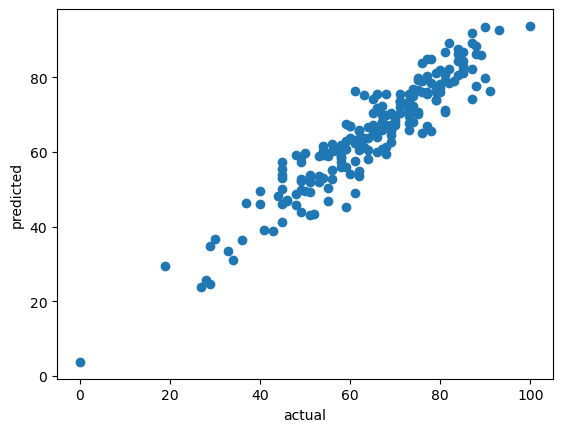

In [69]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual')
plt.ylabel('predicted')

<Axes: xlabel='math score'>

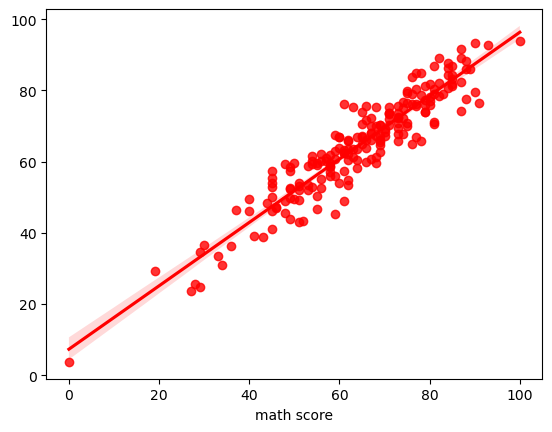

In [70]:
sns.regplot(x=y_test,y=y_pred,color='red')

In [72]:
#difference blw actual and predicted value
pred_df = pd.DataFrame({'actual value':y_test,'predicted_value':y_pred,'difference':y_test-y_pred})
pred_df

,actual value,predicted_value,difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
